<a href="https://colab.research.google.com/github/ggruszczynski/CFDPython/blob/master/lab30_advection_1D/SOLUTION_04_Step_non_conservative_schemes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[@ggruszczynski](https://github.com/ggruszczynski)

12 steps to Navier–Stokes
======
***

### Inspiration

This Jupyter notebook continues the presentation of the **12 steps to Navier-Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com). You should have completed [Step 1](./01_Step_1_to_fill.ipynb) and [Step 2](./02_Step_2_to_fill.ipynb) before continuing, having written your own Python script or notebook and having experimented with varying the parameters of the discretization and observing what happens.


Step 2b: Nonlinear Convection - conservative and nonconservative scheme
-----
***

Now we're going to implement nonlinear convection using the same methods as in step 1,2.  

The 1D convection equation in **non-conservative** form is:


$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$


Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

---

The 1D convection equation in **conservative** form is:


$$\frac{\partial u}{\partial t} +  \frac{\partial}{\partial x} \left(\frac{u^2}{2} \right) = 0$$

Disretizing:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + \frac{(u_i^n)^2 - (u_{i-1}^n)^2}{2 \Delta x}  = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - \frac{\Delta t}{2 \Delta x} \bigg( (u_i^n)^2 - (u_{i-1}^n)^2 \bigg)$$


As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

nx = 10*41
domain_length = 8
dx = domain_length / (nx - 1)
nt = 20*50    #nt is the number of timesteps we want to calculate
dt = 0.1*.025  #dt is the amount of time each timestep covers (delta t)

Try different initial conditions

* the 'hat'

* a smooth, tanh function

* gaussian


(410,)

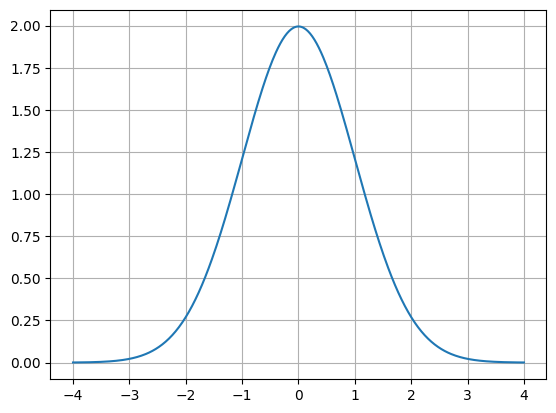

In [2]:
# Try different Initial Conditions
# xspace = np.linspace(0, domain_length, nx)
xspace=np.linspace(-domain_length/2, domain_length/2, num=nx, endpoint=True)
u_IC = np.ones(nx)      #as before, we initialize u with every value equal to 1.
# u_IC[int(.5 / dx) : int(1 / dx + 1)] = 2 #then set u = 2 between 0.5 and 1 as per our I.C.s


# u_IC = -np.tanh(xspace) +1
# u_IC = np.tanh(xspace) +1  # rarefraction wave
# u_IC = -np.tanh(xspace)

gaussian = lambda x, mu, sig :  1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
u_IC = 5* gaussian(xspace, mu = 0., sig = 1.0)

plt.plot(xspace, u_IC)
plt.grid()

xspace
u_IC.shape

In [3]:
def make_sw_plot(x, u_conserv, u_nonconserv):
  plt.clf() # Used to clear the current Figure’s state without closing it.
  plt.close()
  fig = mpl.pyplot.gcf()
  fig.set_size_inches(8,6)
  ax = plt.gca()
  ax.plot(x, u_IC, linestyle="-", color="green", label='x_{IC}')
  ax.set(xlabel='time', ylabel=r'$x_{IC}$')
  ax.set_title(r'$u(t)$')
  ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
  ax.plot(x, u_conserv, linestyle="-", color="blue", label='u_{conservative}')
  ax.plot(x, u_nonconserv, linestyle="-", color="red", label='u_{non-conservative}')
  ax.legend([r"$u_{IC}$",r"$u_{non-conservative}$", r"$u_{conservative}$"],loc="upper right")  #
  plt.grid()
  plt.show()


In [4]:
def nonlinear_advection_nonconservative(u, nt, nx):
  for n in range(nt):  #iterate through time
      un = u.copy()    ##copy the existing values of u into un
      c_ind = np.arange(0, nx)     # un[i]
      r_ind = np.roll(c_ind, 1)   # un[i-1]
      beta = un * dt / dx
      u = un - beta* (un[c_ind] - un[r_ind])
  return u

def nonlinear_advection_conservative(u, nt, nx):
  for n in range(nt):
      un = u.copy()
      c_ind = np.arange(0, nx)
      r_ind = np.roll(c_ind, 1)
      beta = dt / (2*dx)
      u = un - beta* (un[c_ind]**2  - un[r_ind]**2 )
  return u

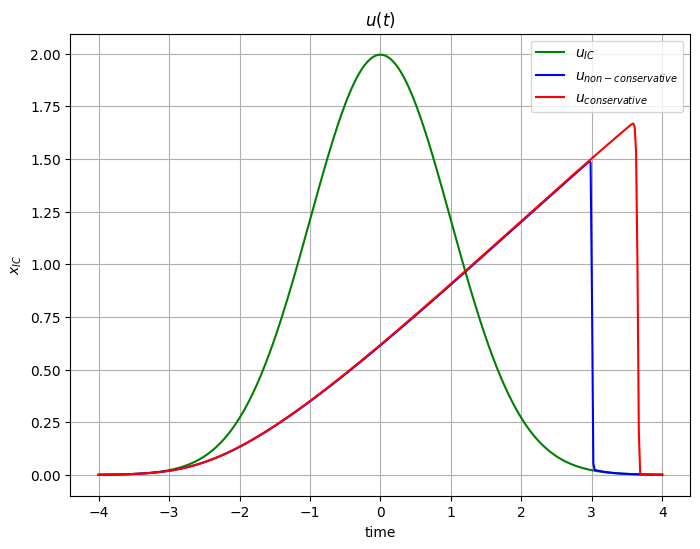

In [5]:
u = u_IC.copy()      #initialize our placeholder array un, to hold the time-stepped solution

u_con = nonlinear_advection_nonconservative(u, nt, nx)
u_noncon = nonlinear_advection_conservative(u, nt, nx)

make_sw_plot(xspace, u_con, u_noncon)

## Observations

* the non-conservative form generates false discontinouties

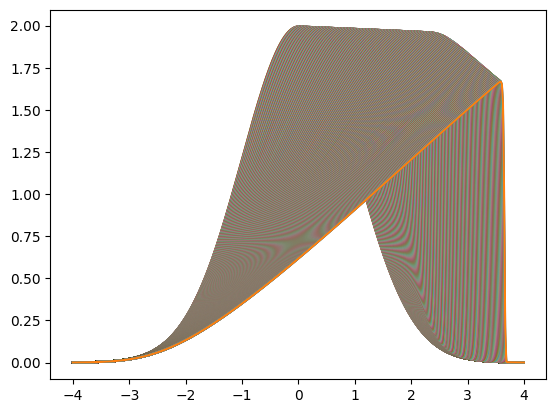

In [8]:
u = u_IC.copy() #initialize our placeholder array un, to hold the time-stepped solution
plt.plot(xspace, u)
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    plt.plot(xspace, u)

    c_ind = np.arange(0, nx)
    for i in range(0, nx):  ##now we'll iterate through the u array  # range(1, nx) - fix left BC

     ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
     ###then uncomment it and run the cell to evaluate Step 2
        # u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])    # constant advection coeff
        u[i] = un[i] - un[i]* dt / dx * (un[i] - un[i-1])  # noncoservative
        # u[i] = un[i] -  dt / (2*dx) * (un[i]**2 - un[i-1]**2)  # conservative


#Plot the results
plt.plot(xspace, u)

# Questions:

* how does the variable advection coefficient influence behaviour of the equation?
* why does the IC=tanh behave differently than IC=-tanh
* In case of an implicit approach... do you need to inverse the $\mathbb{A}$ matrix (see step 1) in each time step?
* How one could speed up the calculation of inverse of $\mathbb{A}$?

What do you observe about the evolution of the hat function under the nonlinear convection equation? What happens when you change the numerical parameters and run again?